# Excel y Graficos


Este es el resumen general de ventas:
              Grupo  Unidades    Euros
0              Agua       120    96.30
1          Bolleria         3     4.50
2              Cafe        78   107.80
3           Cerveza       234   615.15
4   Dulces y tartas        18    30.10
5         Hamburger       207  1420.00
6           Helados        47    91.80
7               Pan        23    34.25
8         Pasapalos         7     8.40
9          Pasticho        11   110.00
10          Pintxos       104   367.50
11            Pizza       470  6157.50
12        Refrescos       214   433.60
13               Te         5     8.00
14           Tragos        20    86.50
15            Vinos       111   253.20
16            Zumos        10    25.00

== Maximo de unidades vendidas y monto ==
Unidades: 470  Euros: 6,157.50

== Minimo de unidades vendidas y monto ==
Unidades: 3  Euros: 4.50

== Total General ==
Unidades vendidas = 1,682
Euros = 9,849.60



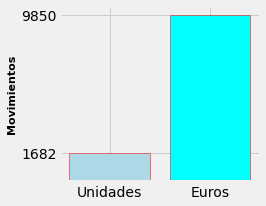

In [1]:
#@title Texto de título predeterminado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

excel = pd.read_excel('/content/drive/My Drive/tablaexcel.xlsx',skiprows=1, sheet_name='datos', names=['Grupo','Producto','Descripcion','Unidades','Total'])
df = pd.DataFrame(excel)
print()

def totales(TotalUnidades, TotalVentas):
  TotalUnidades = format(TotalUnidades,",.0f")
  TotalVentas = format(TotalVentas,",.2f")
  print("== Total General ==")
  print ('Unidades vendidas =',TotalUnidades)
  print ('Euros =', TotalVentas)
  print()

def uni_monto(max, min):
  print("== Maximo de unidades vendidas y monto ==")
  print("Unidades:", max[1],"", "Euros:",format(max[2],",.2f"))
  print()
  print("== Minimo de unidades vendidas y monto ==")
  print("Unidades:", min[1],"", "Euros:",format(min[2],",.2f"))
  print()

def res_ventas(grouped_df):
  print("Este es el resumen general de ventas:")
  print (grouped_df)
  print()

grouped_df = df.groupby(['Grupo']).agg(
    {'Unidades': 'sum', 'Total':'sum'}).reset_index()
grouped_df.columns = ['Grupo',  'Unidades', 'Euros']
res_ventas(grouped_df)

max = np.max(grouped_df)
min = np.min(grouped_df)
uni_monto(max, min)

TotalUnidades = df['Unidades'].sum()
TotalVentas = df['Total'].sum()
totales(TotalUnidades, TotalVentas)

# Grafico
titulos = ['Unidades', 'Euros']
valores = [TotalUnidades, TotalVentas]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
plt.subplot(122)
plt.bar(titulos, valores, color=['lightblue', 'cyan'], edgecolor='red')
plt.xticks(titulos, color='black')
plt.yticks(valores, color='black')
#plt.title('Resumen de Ventas', fontsize=14, ha='center')
plt.ylabel('Movimientos', fontsize=11, color='black', weight='bold', ha='center')
plt.show()


#Resumen general de Ventas

# Consultando por productos

In [ ]:
import numpy as np
from sklearn import preprocessing
import warnings

# Este main tiene como objetivo eliminar el mensaje de error por el bug de la version de numpy
if __name__ == '__main__':
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    #warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
    le = preprocessing.LabelEncoder()
    le.fit([1, 2, 2, 6])
    le.transform([1, 1, 2, 6])
    le.inverse_transform([0, 0, 1, 2])

listado = grouped_df                                            # Se carga el DataFrame del proceso anterior
listado1 = np.array(listado)                                    # Esta variable convierte el listado en un arreglo  
print()
continuar = 'si'                                                # Variable inicializada para el While
while continuar == 'si':                                        # Proceso que se mantendra activo mientras se quieran hacer consultas
  producto = input("Que producto deseas consultar?:\n")           # Variable que contiene el producto a consultar
  producto = producto.capitalize()                              # Se convierte la primera letra mayuscula de la opcion opcion recibida por el usuario
  index = np.where(listado1 == producto)                        # Se hace la comparacion de la solicitud contra el DataFrame
  punta = (index[0])                                            # Variable con la posicion del producto encontrado                
  if punta >= 0 :                                               # Validacion para encontrar el producto
    print()                                                     # Linea de separacion
    print("El producto","'",producto,"'", "se ha vendido de la siguiente manera: ")   # Informacion por pantalla
    print(['{:.0f}'.format(item) for item in listado1 [punta,1]],"Unidades")          # Informacion de la cantidad de unidades vendidas, buscando la fila y la columna correspondiente
    print(['{:,.2f}'.format(item) for item in listado1 [punta,2]],"Euros")            # Idem pero mostrando el monto
    print()
    continuar = input("Deseas seguir haciendo consultas? (si)/(no):\n")               # Solicitud de continuar
    continuar = continuar.lower()                               # Se convierte en minusculas la respuesta obtenida
    if continuar =='no':
          break                                                 # Dentro del ciclo se valida la respuesta para seguir o no consultando
    else:
      print("Seguimos...")
      print()
  else:                                                         # Si el producto no estaba en la lista, aqui se valida 
    print("El producto","'",producto,"'","no esta en la lista de ventas")
    print()
print("Gracias, hasta luego...")



Que producto deseas consultar?:
perro
El producto ' Perro ' no esta en la lista de ventas

Que producto deseas consultar?:
cerveza

El producto ' Cerveza ' se ha vendido de la siguiente manera: 
['234'] Unidades
['615.15'] Euros

Deseas seguir haciendo consultas? (si)/(no):
si
Seguimos...

Que producto deseas consultar?:
pizza

El producto ' Pizza ' se ha vendido de la siguiente manera: 
['470'] Unidades
['6,157.50'] Euros

Deseas seguir haciendo consultas? (si)/(no):
no
Gracias, hasta luego...


Tratando de graficar

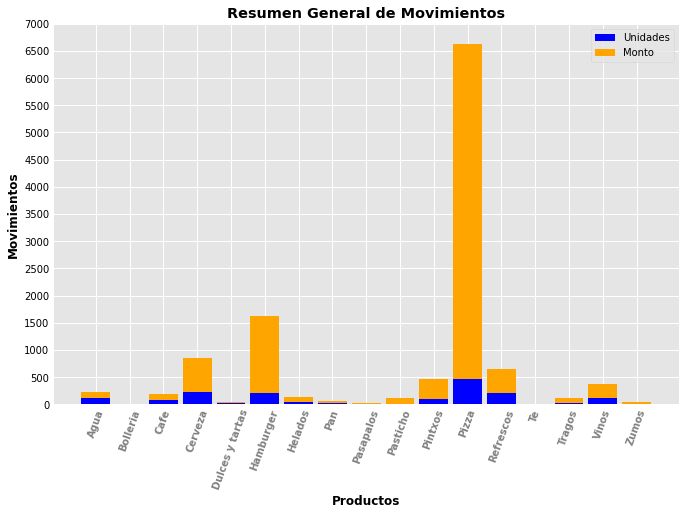

In [ ]:
import matplotlib.pyplot as plt

grafica = len(listado1)
n = grafica
indice = np.arange(n)
ancho = 0.85
lista = []

plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
for i in range (n): 
  producto = (listado1 [i,0])
  unidades =  (listado1 [i,1])
  monto =  (listado1 [i,2])
  lista.append(producto)
  plt.bar(i, unidades, ancho, color='blue')
  plt.bar(i, monto, ancho, 
             bottom=unidades, color='orange')
  plt.xticks(indice, lista, rotation=70, color='grey', weight='bold')
 
plt.title('Resumen General de Movimientos', color='black', weight='bold')
plt.ylabel('Movimientos', color='black', weight='bold')
plt.xlabel('Productos', color='black', weight='bold')
plt.legend(('Unidades', 'Monto'))
plt.yticks(np.arange(0, 7500, 500), color='black')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

grafica = len(listado1)
rng = np.random.RandomState(0)
#colors = rng.rand(grafica)
#sizes = 2000 * rng.rand(grafica)

for i in range (10,15):
  x =  (listado1 [i,0])
  y =  (listado1 [i,1])
  sizes =  (i*100)
  colors = (sizes**2)
  plt.scatter(x,y, c = colors, s = sizes, alpha=0.3, cmap='viridis')
  a = x
plt.suptitle('Movimiento de Productos') 
plt.ylabel('Unidades')
plt.xlabel('Productos')
plt.colorbar();


In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(grafica)
y = rng.randn(grafica)
z = rng.randn(grafica)
colors = rng.rand(grafica)
sizes = 2000 * rng.rand(grafica)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale
plt.xlabel('Productos')

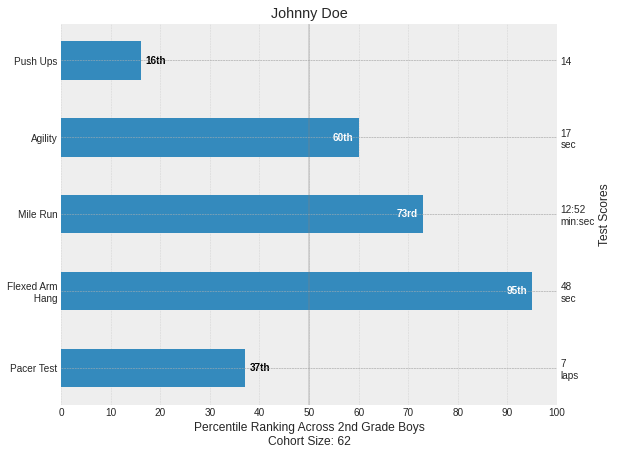

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
testNames = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
             'Push Ups']
testMeta = dict(zip(testNames, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """helper function to add ordinal string to integers

    1 -> 1st
    56 -> 56th
    """
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = testMeta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(testNames):
        return ''
    else:
        return testNames[y]


def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(testNames))

    rects = ax1.barh(pos, [scores[k].percentile for k in testNames],
                     align='center',
                     height=0.5,
                     tick_label=testNames)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in testNames]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}

plt.style.use('bmh')
student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(testNames,
                  (Score(v, p) for v, p in
                   zip(['7', '48', '12:52', '17', '14'],
                       np.round(np.random.uniform(0, 1,
                                                  len(testNames)) * 100, 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()